In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
trans = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [3]:
ds_mnist = torchvision.datasets.MNIST(".", transform=trans)

torch.Size([1, 28, 28])
torch.Size([28, 28])
5


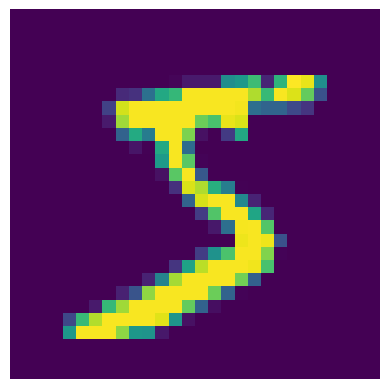

In [4]:
print(ds_mnist[0][0].shape)
print(ds_mnist[0][0].squeeze().shape)
plt.axis("off")
plt.imshow(ds_mnist[0][0].squeeze())
print(ds_mnist[0][1])

In [5]:
batch_size = 16
dataloader = torch.utils.data.DataLoader(ds_mnist, batch_size=batch_size, shuffle=True, drop_last=True)

In [6]:
for img, label in dataloader:
    print(img.shape)
    print(label.shape)
    break

torch.Size([16, 1, 28, 28])
torch.Size([16])


In [7]:
class NeuralNumbers(nn.Module):
    def __init__(self):
        super().__init__()
        self.flat = nn.Flatten()
        self.linear1 = nn.Linear(28 * 28, 100)
        self.linear2 = nn.Linear(100, 100)
        self.linear3 = nn.Linear(100, 10)
        self.activation = nn.ReLU()
        
    def forward(self, x):
        x = self.flat(x)
        x = self.activation(self.linear1(x))
        x = self.activation(self.linear2(x))
        x = self.activation(self.linear3(x))
        return x
    

In [8]:
model = NeuralNumbers()

In [9]:
loss_fn = nn.CrossEntropyLoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)

In [11]:
epochs = 5

for epoch in range(epochs):
    loss_val = 0
    for img, label in (pbar := tqdm(dataloader)):
        optimizer.zero_grad()
        pred = model(img)
        label = F.one_hot(label, 10).float()
        loss = loss_fn(pred, label)
        loss.backward()
        loss_val += loss.item()
        
        optimizer.step()
        
        pbar.set_description(f"loss: {loss.item():.5f}")
    print(loss_val / len(dataloader))

loss: 1.40576: 100%|██████████| 3750/3750 [01:38<00:00, 37.97it/s]


1.562981344850858


loss: 0.73487: 100%|██████████| 3750/3750 [01:51<00:00, 33.77it/s]


1.1037349614898364


loss: 0.21521: 100%|██████████| 3750/3750 [01:14<00:00, 50.40it/s] 


0.7472377012009422


loss: 1.10486: 100%|██████████| 3750/3750 [01:25<00:00, 43.96it/s] 


0.6867399440020323


loss: 0.77737: 100%|██████████| 3750/3750 [01:28<00:00, 42.60it/s]

0.653815554845333


In [12]:
print(model)

NeuralNumbers(
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=100, bias=True)
  (linear3): Linear(in_features=100, out_features=10, bias=True)
  (activation): ReLU()
)


9
9


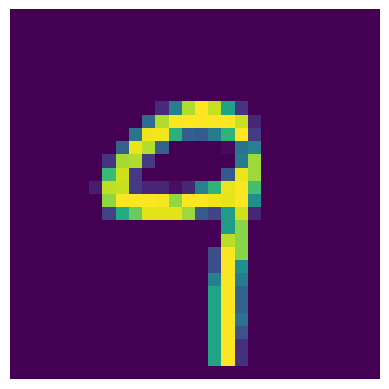

In [13]:
num = 45345
print(ds_mnist[num][1])
print(model(ds_mnist[num][0]).detach().numpy().argmax())
plt.axis("off")
plt.imshow(ds_mnist[num][0].squeeze())

QSettings::value: Empty key passed
QSettings::value: Empty key passed


In [ ]:
cv2.destroyAllWindows()